In [ ]:
#Defining the directory in kaggle
!mkdir -p ~/.kaggle
!cp kg.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#Downloading the needed dataset from kaggle
!kaggle datasets download -d suvooo/hindi-character-recognition

hindi-character-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Importing all the needed libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import  Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

In [ ]:
#Unzipping the content of dataset
import zipfile
zip_ref=zipfile.ZipFile('/content/hindi-character-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/DevanagariHandwrittenCharacterDataset/Train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(64,64)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/DevanagariHandwrittenCharacterDataset/Test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(64,64)
)


Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


In [ ]:
#Normalising the training and testing dataset
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
#create CNN Model
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


In [ ]:
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(46, activation='softmax'))


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_3 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 29, 29, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:

custom_learning_rate = 0.001
opt = optimizers.Adam(learning_rate=custom_learning_rate)


In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
2444/2444 [==============================] - 34s 12ms/step - loss: 0.6081 - accuracy: 0.8281 - val_loss: 0.1697 - val_accuracy: 0.9500
Epoch 2/20
2444/2444 [==============================] - 28s 12ms/step - loss: 0.1835 - accuracy: 0.9452 - val_loss: 0.1112 - val_accuracy: 0.9689
Epoch 3/20
2444/2444 [==============================] - 29s 12ms/step - loss: 0.1200 - accuracy: 0.9642 - val_loss: 0.1176 - val_accuracy: 0.9712
Epoch 4/20
2444/2444 [==============================] - 28s 12ms/step - loss: 0.0960 - accuracy: 0.9711 - val_loss: 0.0888 - val_accuracy: 0.9781
Epoch 5/20
2444/2444 [==============================] - 30s 12ms/step - loss: 0.0751 - accuracy: 0.9774 - val_loss: 0.1044 - val_accuracy: 0.9736
Epoch 6/20
2444/2444 [==============================] - 28s 11ms/step - loss: 0.0688 - accuracy: 0.9801 - val_loss: 0.0799 - val_accuracy: 0.9801
Epoch 7/20
2444/2444 [==============================] - 29s 12ms/step - loss: 0.0609 - accuracy: 0.9822 - val_loss: 0.0762 -

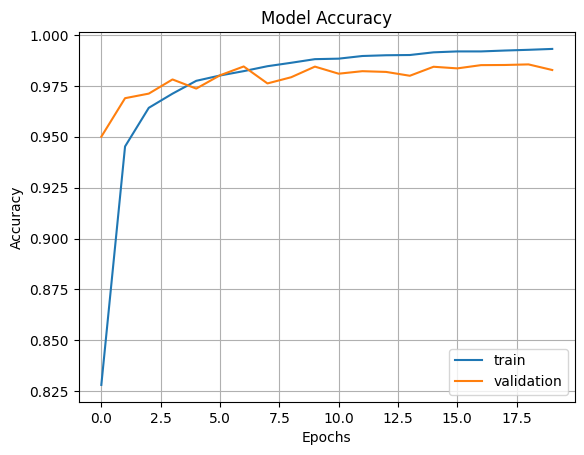

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


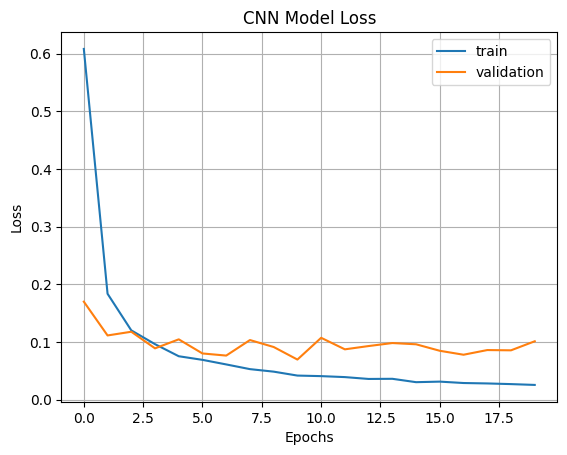

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [ ]:
#HERE I HAVE SPECIFIED THE CLASS NAMES PRESENT IN THE TRAIN DIRECTORY
import os

dataset_directory = '/content/DevanagariHandwrittenCharacterDataset/Train'

class_names = os.listdir(dataset_directory)
print(class_names)


['character_13_daa', 'character_25_ma', 'character_35_tra', 'character_16_tabala', 'character_20_na', 'character_10_yna', 'digit_2', 'character_27_ra', 'character_23_ba', 'character_26_yaw', 'digit_1', 'character_31_petchiryakha', 'character_9_jha', 'character_11_taamatar', 'digit_8', 'character_5_kna', 'character_28_la', 'character_29_waw', 'digit_0', 'digit_9', 'character_1_ka', 'digit_6', 'character_4_gha', 'character_14_dhaa', 'digit_5', 'digit_3', 'character_19_dha', 'character_21_pa', 'character_22_pha', 'digit_7', 'character_2_kha', 'character_7_chha', 'character_24_bha', 'character_6_cha', 'character_3_ga', 'character_15_adna', 'digit_4', 'character_18_da', 'character_30_motosaw', 'character_8_ja', 'character_36_gya', 'character_34_chhya', 'character_12_thaa', 'character_33_ha', 'character_17_tha', 'character_32_patalosaw']


In [ ]:
predictions = model.predict(validation_ds)
predicted_labels = np.argmax(predictions, axis=0)
validation_loss, validation_accuracy = model.evaluate(validation_ds)
print(f"Validation Accuracy:{validation_accuracy*100:.2f}%")


432/432 [==============================] - 3s 7ms/step - loss: 0.1011 - accuracy: 0.9828
Validation Accuracy:98.28%


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_labels=[]
predicted_labels=[]
for images,labels in validation_ds:
  predicted_labels_batches=model.predict(images)
  predicted_labels_batches=tf.argmax(predicted_labels_batches,axis=1)
  test_labels.append(labels.numpy())
  predicted_labels.append(predicted_labels_batches.numpy())
test_labels=np.concatenate(test_labels)
predicted_labels=np.concatenate(predicted_labels)

if len(test_labels.shape)>1:
  test_labels=np.argmax(test_labels,axis=1)

confusion_mat=confusion_matrix(test_labels,predicted_labels)
print('Confusion matrix:')
print(confusion_mat)

precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print('classification_Report:')
print(classification_report(test_labels,predicted_labels))

1/1 [==============================] - 0s 21ms/step
Confusion matrix:
[[295   0   0 ...   0   0   0]
 [  0 293   2 ...   0   1   0]
 [  0   0 298 ...   0   0   0]
 ...
 [  0   0   0 ... 298   0   0]
 [  0   0   0 ...   0 300   0]
 [  0   0   0 ...   0   0 298]]
Precision: 0.9830
Recall: 0.9828
F1 Score: 0.9828
classification_Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       300
           1       0.98      0.98      0.98       300
           2       0.98      0.99      0.99       300
           3       0.97      0.98      0.98       300
           4       0.99      0.98      0.98       300
           5       1.00      0.99      0.99       300
           6       0.97      0.98      0.98       300
           7       0.97      0.97      0.97       300
           8       0.95      0.97      0.96       300
           9       0.98      0.97      0.98       300
          10       1.00      0.99      0.99       300
          11    

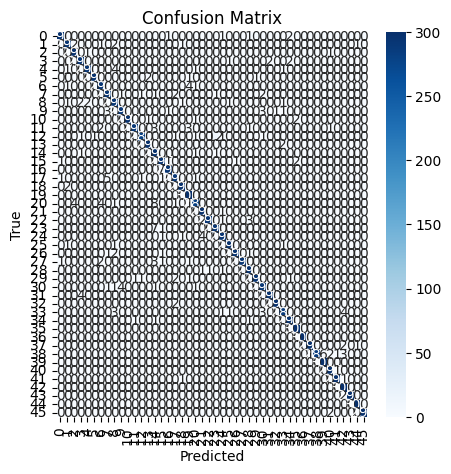

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Define class names
class_names = [str(i) for i in range(46)]

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/ka.jpg')

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape
test_img=cv2.resize(test_img,(64,64))

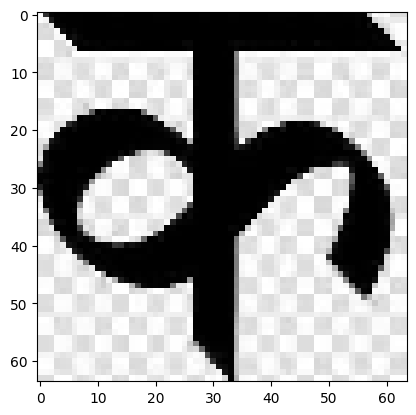

In [ ]:
plt.imshow(test_img)

In [ ]:
test_input=test_img.reshape((1,64,64,3))


In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 123ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
predict_array = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Obtain class labels are-
class_labels = ['character_14_dhaa', 'digit_8', 'character_29_waw', 'digit_6', 'character_12_thaa', 'character_20_na', 'character_36_gya', 'character_13_daa', 'character_28_la', 'character_2_kha', 'digit_7', 'character_26_yaw', 'character_21_pa', 'digit_0', 'digit_3', 'character_17_tha', 'character_24_bha', 'character_18_da', 'character_30_motosaw', 'character_25_ma', 'character_31_petchiryakha', 'character_1_ka', 'character_10_yna', 'character_4_gha', 'character_33_ha', 'character_32_patalosaw', 'character_35_tra', 'character_27_ra', 'character_15_adna', 'digit_5', 'digit_9', 'character_8_ja', 'character_19_dha', 'character_5_kna', 'character_11_taamatar', 'character_34_chhya', 'character_3_ga', 'digit_2', 'character_16_tabala', 'character_6_cha', 'digit_1', 'character_22_pha', 'character_7_chha', 'digit_4', 'character_9_jha', 'character_23_ba']

# Finding the index with the highest probability
predict_index = np.argmax(predict_array)

# Get the corresponding predicted class label
predict_class = class_labels[predict_index]

print(f"The predicted class is: {predict_class}")


The predicted class is: character_1_ka
The predicted class is: character_1_ka
